In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv("sales_CA1_sample.csv")  # Adjust path as needed
df.head()

,id,item_id,dept_id,cat_id,store_id,d,sales,date,weekday,wday,month,year
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011


In [4]:
# Shape and column details
print("Shape:", df.shape)
df.info()

Shape: (5918109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918109 entries, 0 to 5918108
Data columns (total 12 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        object
 1   item_id   object
 2   dept_id   object
 3   cat_id    object
 4   store_id  object
 5   d         object
 6   sales     int64 
 7   date      object
 8   weekday   object
 9   wday      int64 
 10  month     int64 
 11  year      int64 
dtypes: int64(4), object(8)
memory usage: 541.8+ MB


In [5]:
# Null values
print("Null values:\n", df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())

Null values:
 id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
d           0
sales       0
date        0
weekday     0
wday        0
month       0
year        0
dtype: int64

Duplicates: 0


In [8]:
# Unique item_ids, categories, etc.
print("Unique item_ids:", df['item_id'].nunique())
print("Categories:", df['cat_id'].unique())
print("Sample categories counts:\n", df['cat_id'].value_counts())


Unique item_ids: 3049
Categories: ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Sample categories counts:
 cat_id
FOODS        2789217
HOUSEHOLD    2032227
HOBBIES      1096665
Name: count, dtype: int64


In [11]:
list = df['cat_id'].unique()

In [12]:
list

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [13]:
hobbies = list[0]
hobbies

'HOBBIES'

In [15]:
household = list[1]
household

'HOUSEHOLD'

In [16]:
foods = list[2]
foods

'FOODS'

In [18]:
df['cat_id'].value_counts()

cat_id
FOODS        2789217
HOUSEHOLD    2032227
HOBBIES      1096665
Name: count, dtype: int64

In [28]:
dis_foods = 10
dis_household = (2789217/2032227) * 100 * (dis_foods/100)
dis_household

13.724928366762178

In [29]:
dis_hobbies = (2789217/1096665) * 100 * (dis_foods/100)
dis_hobbies

25.433628318584073

In [30]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values("date")
df.head()


,id,item_id,dept_id,cat_id,store_id,d,sales,date,weekday,wday,month,year
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
2027,FOODS_2_201_CA_1_evaluation,FOODS_2_201,FOODS_2,FOODS,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
2028,FOODS_2_202_CA_1_evaluation,FOODS_2_202,FOODS_2,FOODS,CA_1,d_1,1,2011-01-29,Saturday,1,1,2011
2029,FOODS_2_203_CA_1_evaluation,FOODS_2_203,FOODS_2,FOODS,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011
2030,FOODS_2_204_CA_1_evaluation,FOODS_2_204,FOODS_2,FOODS,CA_1,d_1,0,2011-01-29,Saturday,1,1,2011


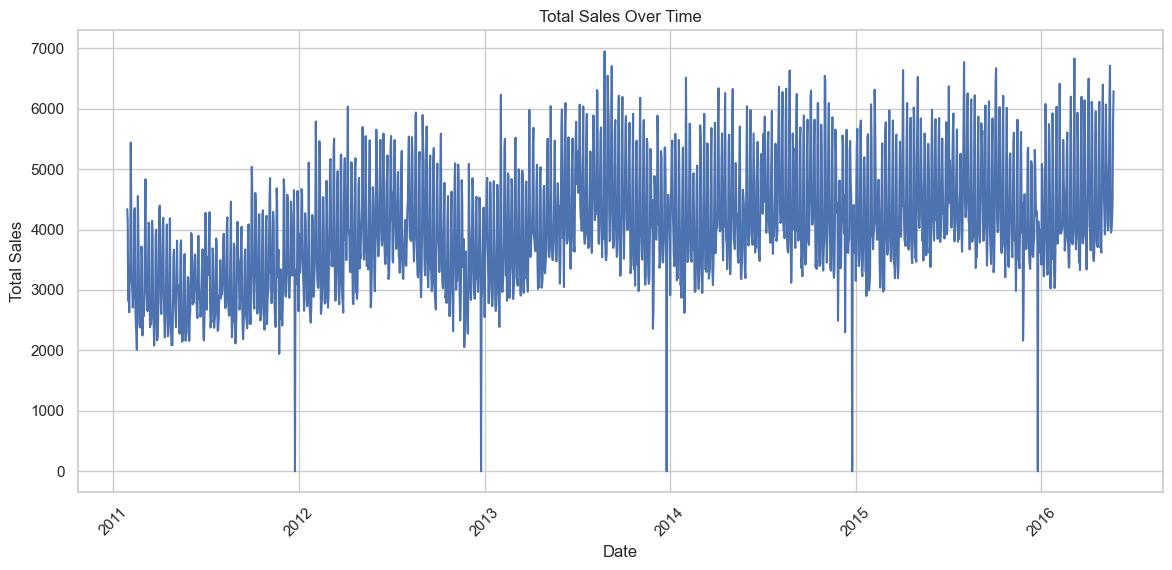

In [32]:
daily_sales = df.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [34]:
category_summary = df.groupby("cat_id")["sales"].agg(['mean', 'median', 'std', 'sum']).reset_index()
category_summary


,cat_id,mean,median,std,sum
0,FOODS,1.961719,0.0,5.379334,5471661
1,HOBBIES,0.813451,0.0,2.831033,892083
2,HOUSEHOLD,0.722608,0.0,1.650137,1468504
